<font face="TeX Gyre Pagella" color="red" size="4"><b>README</b></font>

<font face="TeX Gyre Pagella" size="4">This book was created to demonstrate knowledge of building Linear Regression Models. The structure will consist of the following sections: 1. Dataset generation, 2. Dataset visualization, 3. Model construction, 4. Predicting values.
Please consider data generated here is not a real sample and it's only used as an exercise </font>


<font face="TeX Gyre Pagella"  size="4"><b>1. DATASET GENERATION</b></font>

<font face="TeX Gyre Pagella" size="4">The data will be generated randomly. We are going to describe a relation between hours of study and academic scores in Calculus.</font>



In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
np.random.seed(0)
horas_estudio = np.random.randint(1, 10, 100)
X = np.sort(horas_estudio, axis=0)
puntuacion = 2 * horas_estudio + np.random.normal(0, 5, 100) #Relation btw study hours and score
puntuacion = np.interp(puntuacion, (puntuacion.min(), puntuacion.max()), (0, 50)) #Re-escaling values from 0 to 50
Y = np.sort(puntuacion, axis=0)

<font face="TeX Gyre Pagella"  size="4"><b>2. DATA VISUALIZATION</b></font>

<font face="TeX Gyre Pagella" size="4">Let's see how the data is distributed on a plot.</font>


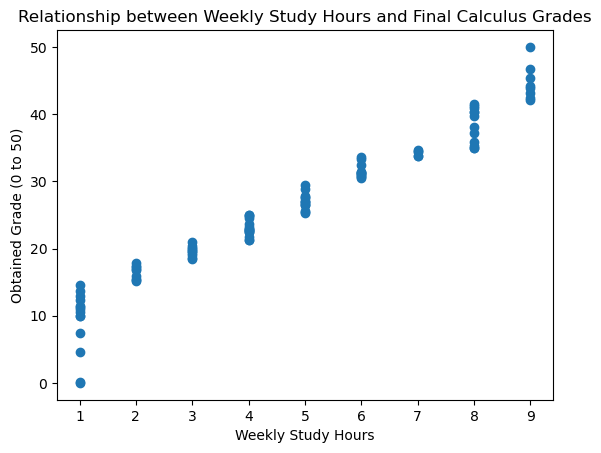

In [24]:
%matplotlib inline
plt.scatter(X, Y)
plt.xlabel('Weekly Study Hours')
plt.ylabel('Obtained Grade (0 to 50)')
plt.title('Relationship between Weekly Study Hours and Final Calculus Grades')
plt.show()


<font face="TeX Gyre Pagella"  size="4"><b>3. MODEL CONSTRUCTION</b></font>

<font face="TeX Gyre Pagella" size="4">We will use scikit-learn to build our linear regression model as it seems it fits the data distribution .</font>


In [25]:
data = {'Weekly Study Hours': X.flatten(), 'Obtained Grade' : Y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,Weekly Study Hours,Obtained Grade
0,1,0.000000
1,1,0.090779
2,1,4.600550
3,1,7.360854
4,1,9.939865
5,1,10.016763
6,1,10.570362
7,1,10.938890
8,1,11.246286
9,1,11.427491


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression()
reg.fit(df['Weekly Study Hours'].values.reshape(-1, 1), df['Obtained Grade'].values)

LinearRegression()

In [28]:
# b parameter or intercept
reg.intercept_

6.461454701093359

In [29]:
# Min and Max values 
X_min_max = np.array([[df['Obtained Grade'].min()], [df['Obtained Grade'].max()]])
Y_model = reg.predict(X_min_max)

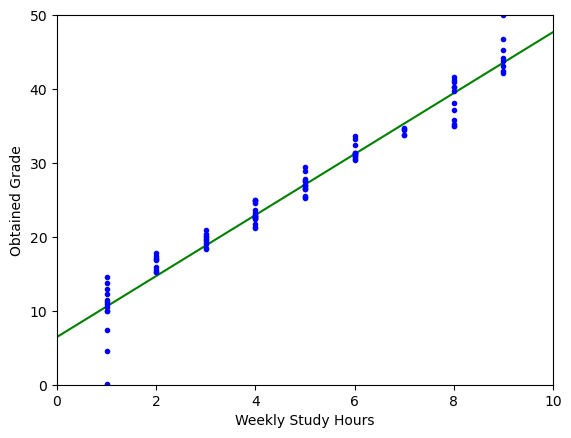

In [30]:
# Hypothesis function plot
plt.plot(X_min_max, Y_model, 'g-')
plt.plot(df['Weekly Study Hours'], df['Obtained Grade'], 'b.')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Obtained Grade')
plt.xlim(0,10)
plt.ylim(0, 50)
plt.show()

<font face="TeX Gyre Pagella"  size="4"><b>4. PREDICTING NEW VALUES</b></font>

<font face="TeX Gyre Pagella" size="4">Let's see what the model does .</font>

In [31]:
x_new = np.array([[4]])
# Score prediction
y_new = reg.predict(x_new)
print(f'Studying {x_new} hours a week, we expect your score during the semester will be {y_new}')

Studying [[4]] hours a week, we expect your score during the semester will be [22.95807523]
